# LDA(Linear Discriminant Analysis)

***
**LDA**는 **선형 판별 분석**으로도 불리며 PCA와 유사한 방식으로 작동됩니다. PCA와 달리 LDA는 **분류(Classification)**에 특화되어 **타겟 값을 분류할 수 있는 기준을 유지하며 차원을 축소**합니다. 즉 타겟 값을 최대한 잘 분리할 수 있는 축을 찾는 방법이라고 할 수 있습니다.

LDA는 **클래스 간 분산**(between-class scatter)은 **크게** 만들고 **클래스 내부 분산**(within-class scatter)은 **작게** 가져 가는 방식으로 차원을 축소합니다.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
scaled_df = MinMaxScaler().fit_transform(iris.data)

In [4]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [5]:
lda.fit(scaled_df, iris.target)

LinearDiscriminantAnalysis(n_components=2)

lda는 PCA와 달리 **지도학습**이기 때문에 클래스의 값이 fit에 필요하다.

In [6]:
lda_iris = lda.transform(scaled_df)

In [11]:
lda_df = pd.DataFrame(lda_iris, columns = ['lda_1', 'lda_2'])

In [13]:
lda_df['target'] = iris.target

In [14]:
lda_df

,lda_1,lda_2,target
0,-8.061800,0.300421,0
1,-7.128688,-0.786660,0
2,-7.489828,-0.265384,0
3,-6.813201,-0.670631,0
4,-8.132309,0.514463,0
...,...,...,...
145,5.645003,1.677717,2
146,5.179565,-0.363475,2
147,4.967741,0.821141,2
148,5.886145,2.345091,2


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


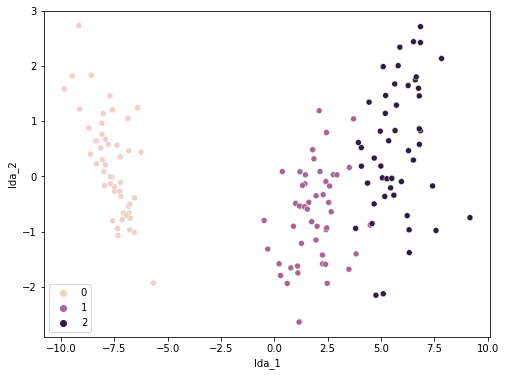

In [24]:
plt.figure(figsize = (8, 6))
sns.scatterplot(lda_df.lda_1, lda_df.lda_2, hue = lda_df.target, data = lda_df)
plt.legend(loc = 'lower left')
plt.show()